In [1]:
#Homicide (as of Friday March 9) 

In [51]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gmaps
import requests
import json

# Google developer API key
from config import gkey

#Access maps with unique API key
gmaps.configure(api_key=gkey)

In [56]:
properties_path= "raw_data/postalcode_added.csv"

In [57]:
properties_data = pd.read_csv(properties_path)

In [58]:
properties_data.head(3)

,Address,AreaName,Price,lat,lng,postal_code,neighbourhood
0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266,M9R 2N8,Etobicoke
1,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118,M5A 2P8,Toronto
2,"254A Monarch Park Ave Toronto, ON",Old East York,1488000,43.686375,-79.328918,M4J 4S5,East York


In [59]:
homicide_path= "raw_data/Homicide_postaladded.csv"

In [60]:
homicide_data = pd.read_csv(homicide_path)

In [61]:
#homicide_data.dtypes

Homicide_Year               int64
Homicide_Lat              float64
Homicide_Lng              float64
Homicide_Neighbourhood     object
Homicide_Postal_Code       object
Homicide_Neighborhood2     object
Homicide_Postal_Group      object
dtype: object

In [62]:
#select relevant columns
#homicide_data = homicide_rawdata.loc[:, ['Occurrence_year',"Lat","Long",'Neighbourhood']]

#rename column names 
#homicide_data .rename(columns={'Occurrence_year':'Homicide_Year',
#                          'Lat':'Homicide_Lat',
#                          'Long':'Homicide_Lng',
#                          'Neighbourhood':'Homicide_Neighbourhood'},inplace=True)
 
#select only 2016 records to match available data from the property.csv 
#homicide_data = homicide_data.loc[homicide_data["Homicide_Year"]==2016]
#homicide_data.reset_index(drop=True)
#homicide_data.head()


In [63]:
#check if any missing values and found none
homicide_data.count()

Homicide_Year             75
Homicide_Lat              75
Homicide_Lng              75
Homicide_Neighbourhood    75
Homicide_Postal_Code      75
Homicide_Neighborhood2    75
Homicide_Postal_Group     75
dtype: int64

In [64]:
homicide_data.head(5)

,Homicide_Year,Homicide_Lat,Homicide_Lng,Homicide_Neighbourhood,Homicide_Postal_Code,Homicide_Neighborhood2,Homicide_Postal_Group
0,2016,43.667374,-79.381638,Church-Yonge Corridor (75),M4Y 1L5,Old Toronto,M4Y
1,2016,43.705143,-79.529404,Weston (113),M9N 1Z2,North York,M9N
2,2016,43.742729,-79.540337,Humbermede (22),M9M 1N6,Toronto,M9M
3,2016,43.704571,-79.396797,Mount Pleasant West (104),M4S 1V5,Old Toronto,M4S
4,2016,43.657211,-79.404076,University (79),M5T 3A9,Old Toronto,M5T


In [65]:
#Loop through the Homocide_pd and run a lat/long search for each city
#for index, row in homicide_data.iterrows():
#    latitude = row['Homicide_Lat']
#    longitude = row['Homicide_Lng']
#Build the query url
#    base_url = "https://maps.googleapis.com/maps/api/geocode/json?key=" + gkey + "&latlng=" + f"{latitude},{longitude}"
   
    #Make request
#    postalcode_neigh = requests.get(base_url)
    
#    code = postalcode_neigh.status_code
        
    #Convert to json
#    postalcode_neigh = postalcode_neigh.json()
#    homicide_data.loc[index, "Homicide_Postal_Code"] = postalcode_neigh["results"][0]["address_components"][-1]["long_name"]
#    homicide_data.loc[index, "Homicide_Neighborhood2"] = postalcode_neigh["results"][0]["address_components"][2]["long_name"]
#    homicide_data["Homicide_Postal_Group"]=homicide_data['Homicide_Postal_Code'].str[:3]


In [66]:
#create test file for homicide populated with postal codes and Neighborhoods
#filename = "Homicide_postaladded.csv"
#with open(filename, 'a') as f:
#    homicide_data.to_csv(f, header=f.tell()==0)

In [73]:
homicide_hood.head() 

,Homicide_Year,Homicide_Lat,Homicide_Lng,Homicide_Neighbourhood,Homicide_Postal_Code,Homicide_Neighborhood2,Homicide_Postal_Group
0,2016,43.667374,-79.381638,Church-Yonge Corridor (75),M4Y 1L5,Old Toronto,M4Y
1,2016,43.705143,-79.529404,Weston (113),M9N 1Z2,North York,M9N
2,2016,43.742729,-79.540337,Humbermede (22),M9M 1N6,Toronto,M9M
3,2016,43.704571,-79.396797,Mount Pleasant West (104),M4S 1V5,Old Toronto,M4S
4,2016,43.657211,-79.404076,University (79),M5T 3A9,Old Toronto,M5T
5,2016,43.657211,-79.404076,University (79),M5T 3A9,Old Toronto,M5T
6,2016,43.649132,-79.437943,Little Portugal (84),M6K 2S5,Old Toronto,M6K
7,2016,43.708019,-79.341385,Thorncliffe Park (55),M4H 1C5,East York,M4H
8,2016,43.737808,-79.520134,Glenfield-Jane Heights (25),M3N 2T5,Toronto,M3N
9,2016,43.650467,-79.371910,Moss Park (73),M5C 1G8,Old Toronto,M5C


In [75]:
#Group homicide records by neighborhoods 
homicide_hood =homicide_data.groupby("Homicide_Neighborhood2")
homicide_hood_count = homicide_hood["Homicide_Neighborhood2"].count()
homicide_hood_bar = pd.DataFrame({"Homicide Count":homicide_hood_count})
homicide_hood_bar

,Homicide Count
Homicide_Neighborhood2,
East York,4
Etobicoke,11
North York,9
Old Toronto,21
Scarborough,14
Toronto,15
York,1


In [79]:
homicide_hood_bar_sort=homicide_hood_bar.sort_values("Homicide Count",ascending=False)
homicide_hood_bar_top5 = homicide_hood_bar_sort.iloc[0:5]
#loop through data frame to get top 5 hoods in a list
homicide_hood_bar_top5 

,Homicide Count
Homicide_Neighborhood2,
Old Toronto,21
Toronto,15
Scarborough,14
Etobicoke,11
North York,9


Text(0.5, 1.0, 'Top 5 Homicide Neighborhoods in Toronto - 2016 ')

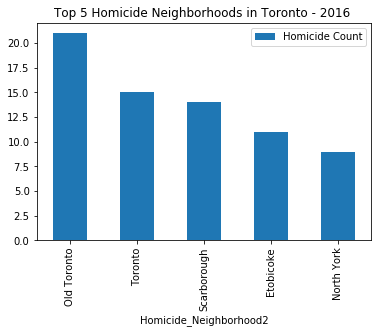

In [80]:
homicide_hood_bar_top5 .plot(kind='bar')
plt.title('Top 5 Homicide Neighborhoods in Toronto - 2016 ')

In [82]:
#Read in property prices for to 5 crime heighbourhoods 
properties_top5_data = properties_data.loc[properties_data["neighbourhood"]=="Old Toronto"]
#properties_top5_data 

#Get average housing price 

#Make bar chart

--------
#rename column names 
#homicide_data .rename(columns={'Occurrence_year':'Homicide_Year',
#                          'Lat':'Homicide_Lat',
#                          'Long':'Homicide_Lng',
#                          'Neighbourhood':'Homicide_Neighbourhood'},inplace=True)
 

,Address,AreaName,Price,lat,lng,postal_code,neighbourhood
4,"#710 - 1080 Bay St Toronto, ON",Downtown,805900,43.666794,-79.388756,M5S 0A5,Old Toronto
7,"#4905 - 16 Harbour St Toronto, ON",Downtown,1348000,43.642578,-79.376900,M5J 2Y4,Old Toronto
15,"#2705 - 70 Temperance St Toronto, ON",Downtown,325000,43.650372,-79.382347,M5H 3V5,Old Toronto
22,"#3010 - 65 St Mary St Toronto, ON",Downtown,312000,43.666897,-79.389038,M5S 0A6,Old Toronto
29,"68 Kenilworth Ave Toronto, ON",The Beach,1929000,43.668091,-79.301514,M4L 3S5,Old Toronto
30,"#1505 - 125 Western Battery Rd Toronto, ON",Niagara,399900,43.639946,-79.416664,M6K 3R8,Old Toronto
32,"#2403 - 375 King St Toronto, ON",Downtown,548000,43.645641,-79.392952,M5V 1K1,Old Toronto
33,"22 Strathearn Blvd Toronto, ON",Midtown Toronto,5288000,43.691135,-79.415573,M5P 1S7,Old Toronto
35,"#1901 - 231 Fort York Blvd Toronto, ON",Niagara,369000,43.636837,-79.406052,M5V 4A2,Old Toronto
36,"#1010 - 65 East Liberty St Toronto, ON",Liberty Village,420000,43.638054,-79.414818,M6K 0A2,Old Toronto


In [38]:
#Group homicide records by postal areas
#homicide_postal =homicide_data.groupby("Homicide_Postal_Group")
#homicide_postal_count = homicide_postal["Homicide_Postal_Group"].count()
#homicide_rate = homicide_count/75
#homicide_hm = pd.DataFrame({"Homicide Count":homicide_count, "Homocide Rate": homicide_rate})
#homicide_postal_bar = pd.DataFrame({"Homicide Count":homicide_postal_count})
#homicide_postal_bar_sort=homicide_postal_bar.sort_values("Homicide Count",ascending=False)
#homicide_postal_bar_top10 = homicide_postal_bar_sort.iloc[0:10]
#homicide_postal_bar_top10 


In [39]:
#homicide_postal_bar_top10.plot(kind='bar')
#plt.title('Top 10 Homicide Areas in Toronto - 2016 ')


In [40]:
locations_homicide = homicide_data[["Homicide_Lat", "Homicide_Lng"]].astype(float)
print(locations_homicide)

    Homicide_Lat  Homicide_Lng
0      43.667374    -79.381638
1      43.705143    -79.529404
2      43.742729    -79.540337
3      43.704571    -79.396797
4      43.657211    -79.404076
5      43.657211    -79.404076
6      43.649132    -79.437943
7      43.708019    -79.341385
8      43.737808    -79.520134
9      43.650467    -79.371910
10     43.752975    -79.258072
11     43.669415    -79.382492
12     43.677151    -79.334877
13     43.657307    -79.373459
14     43.666161    -79.352913
15     43.641914    -79.412705
16     43.739586    -79.222824
17     43.739586    -79.222824
18     43.739586    -79.222824
19     43.660065    -79.352310
20     43.637348    -79.425339
21     43.768520    -79.500557
22     43.774399    -79.253548
23     43.670212    -79.457031
24     43.734100    -79.609917
25     43.700603    -79.517792
26     43.747040    -79.600159
27     43.699532    -79.556374
28     43.764053    -79.205627
29     43.655464    -79.412613
..           ...           ...
45     4

In [41]:
# Create a homicide Heatmap layer
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)
fig = gmaps.figure()

#homicide_heat_layer = gmaps.heatmap_layer(locations_homicide,dissipating=False, max_intensity=100,
                                 #point_radius = 1)
homicide_heat_layer = gmaps.heatmap_layer(locations_homicide)
fig.add_layer(homicide_heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [22]:
# Assign the marker layer to a variable
figure_layout = {
    'width': '400px',
    'height': '400px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
markers = gmaps.marker_layer(locations_homicide)
# Add the layer to the map
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

In [ ]:
#Code for Property heatmap:

#create locations
locations_property = properties_tor[["lat", "lng"]].astype(float)
colour = [
         'rgba(0, 255, 255, 0)',
         'rgba(0, 255, 255, 1)',
         'rgba(0, 191, 255, 1)',
         'rgba(0, 127, 255, 1)',
         'rgba(0, 63, 255, 1)',
         'rgba(0, 0, 255, 1)',
         'rgba(0, 0, 223, 1)',
         'rgba(0, 0, 191, 1)',
         'rgba(0, 0, 159, 1)',
         'rgba(0, 0, 127, 1)',
         'rgba(63, 0, 91, 1)',
         'rgba(127, 0, 63, 1)',
         'rgba(191, 0, 31, 1)',
         'rgba(255, 0, 0, 1)']

property_heat_layer = gmaps.heatmap_layer(locations_property, gradient=colour)
fig.add_layer(property_heat_layer)


fig